## Pipelines y modelos de Machine Learning

En este notebook vamos a ver cómo se pueden utilizar los pipelines de scikit-learn para encadenar varios pasos de preprocesamiento y modelado de datos.

Usaremos el dataset Adult, que contiene información sobre personas y su salario. El objetivo es predecir si una persona gana más o menos de 50k al año. En este ejercicio usaremos el dataset alojado en UCI Machine Learning Repository.

In [1]:
## instalar ucimlrepo
## pip install ucimlrepo
## pip install certifi

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [2]:
import pandas as pd

adult=pd.DataFrame(X)
adult_y=pd.DataFrame(y)

adult['target']=adult_y

adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Este dataset contiene columnas de varios tipos, lo que nos permitirá ver cómo tratar diferentes tipos de datos en un pipeline.

Iniciamos con un tratamiento para las variables categoricas que tendrá dos partes:

1- Tratamiento de Nulos (usamos SimpleImputer)   
2- Codificación de Variables Categóricas (Usamos OneHotEncoder, OrdinalEncoder, TargetEncoder)


In [3]:
adult.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,target
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [4]:
#adult.drop('target',axis=1,inplace=True)

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
## Diferencias entre education y education-num

adult['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [6]:
adult[['education','education-num']].value_counts()

education     education-num
HS-grad       9                15784
Some-college  10               10878
Bachelors     13                8025
Masters       14                2657
Assoc-voc     11                2061
11th          7                 1812
Assoc-acdm    12                1601
10th          6                 1389
7th-8th       4                  955
Prof-school   15                 834
9th           5                  756
12th          8                  657
Doctorate     16                 594
5th-6th       3                  509
1st-4th       2                  247
Preschool     1                   83
Name: count, dtype: int64

<Axes: >

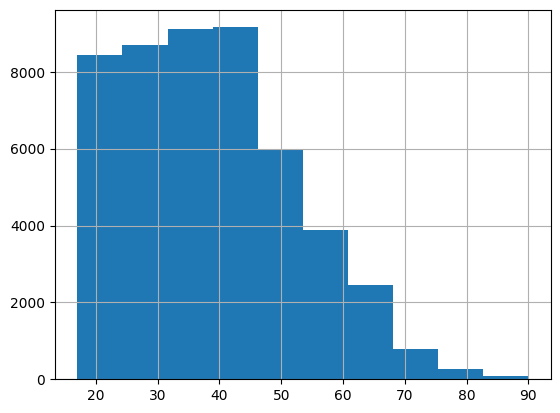

In [7]:
adult['age'].hist()

In [8]:
## Hacemos un boxplot
import matplotlib.pyplot as plt

adult_temp=adult.copy()
print(adult_temp['capital-gain'].quantile(0.90))
adult_temp=adult_temp[adult_temp['capital-gain']<=adult_temp['capital-gain'].quantile(0.90)]
adult_temp

0.0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.


<Axes: >

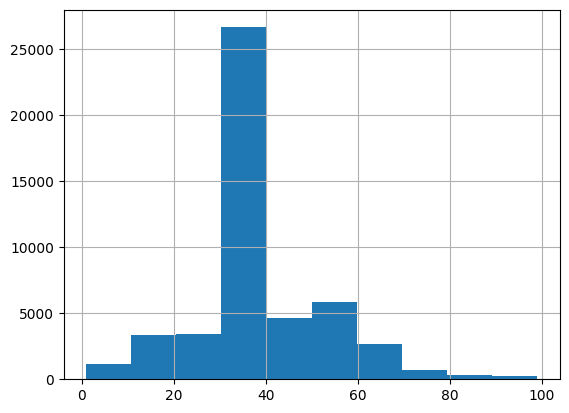

In [9]:
## Hacemos un boxplot de hours-per-week

adult['hours-per-week'].hist()

In [10]:
adult['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [11]:
adult_y['income']=adult_y['income'].str.replace(".","")
## LABEL ENCODER
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

adult_y['income']=le.fit_transform(adult_y['income'])

adult_y['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

## NULOS

Para tratar los nulos, usaremos SimpleImputer. Este transformador nos permite reemplazar los valores nulos por un valor fijo o por la media, mediana, moda, etc. de la columna.


In [12]:
## Hacemos un SimpleImputer para las variables categóricas y otro para las numéricas

## Llamamos el objeto
from sklearn.impute import SimpleImputer

## Instanciamos el objeto
imp_cat = SimpleImputer(strategy='constant',fill_value='?')
imp_num = SimpleImputer(strategy='mean')

## Hacemos un fit_transform para las variables categóricas

adult_cat=imp_cat.fit_transform(adult.select_dtypes(include='object'))
adult_cat=pd.DataFrame(adult_cat,columns=adult.select_dtypes(include='object').columns)

adult_cat['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [13]:
adult['target']=adult['target'].str.replace(".","")

## ENCODERS

Los encoders en scikit-learn son objetos que permiten transformar variables categóricas en numéricas. Existen varios tipos de encoders, cada uno con sus propias características:

- OneHotEncoder: Codifica variables categóricas en variables binarias. Crea una columna por cada categoría distinta en la variable original, y asigna un 1 en la columna correspondiente a la categoría de cada fila.

- OrdinalEncoder: Codifica variables categóricas en variables numéricas enteras. Asigna un número entero a cada categoría distinta en la variable original.

- TargetEncoder: Codifica variables categóricas en variables numéricas, asignando a cada categoría el promedio de la variable objetivo para esa categoría.


In [17]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

### Trabajaremos de acuerdo al plan de preprocesamiento
### OHE -> ['workclass', 'marital-status', 'occupation', 'relationship','race','sex']
### ORD -> ['education']
### TE -> ['native-country']

OHE_COLS=['workclass', 'marital-status', 'occupation', 'relationship','race','sex']
ORD_COLS=['education']
TE_COLS=['native-country']

## Instanciamos los objetos
ohe=OneHotEncoder()
ord=OrdinalEncoder()
te=TargetEncoder()

## Hacemos el fit de los objetos con los datos

ohe.fit(adult[OHE_COLS])
ord.fit(adult[ORD_COLS],adult['education-num'])
te.fit(adult[TE_COLS],adult_y)

## Hacemos la transformación de los datos

ohe_data=ohe.transform(adult[OHE_COLS]).toarray()
ord_data=ord.transform(adult[ORD_COLS])
te_data=te.transform(adult[TE_COLS])

## Hacemos un merge de los datos

adult_data_cat=pd.concat([pd.DataFrame(ohe_data),pd.DataFrame(ord_data),pd.DataFrame(te_data)],axis=1)

adult_data_cat.head()

c:\Users\cizai\miniconda3\envs\m3cidru12024\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,0,0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,0.243977
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,0.243977
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11.0,0.243977
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.243977
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,0.246325


In [19]:
### Hacemos un fit_transform de las variables numéricas

from sklearn.preprocessing import StandardScaler, MinMaxScaler

## HAcemos las estandarización de las variables numéricas de la siguiente forma:
## StandardScaler -> ['capital-gain', 'capital-loss']
## MinMaxScaler -> ['age','hours-per-week']

SS_COLS=['capital-gain', 'capital-loss']
MM_COLS=['age','hours-per-week']

## Instanciamos los objetos
ss=StandardScaler()
mm=MinMaxScaler()

## Hacemos el fit de los objetos con los datos

ss.fit(adult[SS_COLS])      
mm.fit(adult[MM_COLS])

## Hacemos la transformación de los datos

ss_data=ss.transform(adult[SS_COLS])
mm_data=mm.transform(adult[MM_COLS])

## Hacemos un merge de los datos

adult_data_num=pd.concat([pd.DataFrame(ss_data),pd.DataFrame(mm_data)],axis=1)
adult_data_num.columns=['capital-gain', 'capital-loss','age','hours-per-week']

adult_data_num.head()

,capital-gain,capital-loss,age,hours-per-week
0,0.146932,-0.217127,0.301370,0.397959
1,-0.144804,-0.217127,0.452055,0.122449
2,-0.144804,-0.217127,0.287671,0.397959
3,-0.144804,-0.217127,0.493151,0.397959
4,-0.144804,-0.217127,0.150685,0.397959


## CREACION DE PIPELINES

Haremos un pipeline para el preprocesamiento de todos estos datos usando lo que ya definimos.

In [ ]:
### Los objetos que definimos son
## imp_cat -> Imputer para las variables categóricas
## imp_num -> Imputer para las variables numéricas
## ohe -> OneHotEncoder para las variables categóricas
## ord -> OrdinalEncoder para la variable 'education'
## te -> TargetEncoder para la variable 'native-country'
## ss -> StandardScaler para las variables ['capital-gain', 'capital-loss']
## mm -> MinMaxScaler para las variables ['age','hours-per-week']

## Las columnas procesadas segun los encoder son
## OHE_COLS=['workclass', 'marital-status', 'occupation', 'relationship','race','sex']
## ORD_COLS=['education']
## TE_COLS=['native-country']

## SS_COLS=['capital-gain', 'capital-loss']
## MM_COLS=['age','hours-per-week']

## Con esos objetos y usando ColumnTransformer y Pipeline hacemos un artefacto para el preprocesamiento de los datos



## PIPELINE
from sklearn.pipeline import Pipeline

